In [303]:
# Initialize Otter
import otter
grader = otter.Notebook()

In [304]:
import builtins, numpy as np, pandas as pd
print("int is", int)                     # should be <class 'int'>
print("np.dtype(int) ->", np.dtype(int)) # should print something like int64 (not error)

# If either looks wrong, restore:
int   = builtins.int
float = builtins.float
str   = builtins.str
list  = builtins.list
tuple = builtins.tuple

int is <class 'int'>
np.dtype(int) -> int64


## Homework 2: Pandas Review

**This assignment is due Tuesday, October 14th at 11:59 PM.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will review the commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays)
* Split-Apply-Combine operations with `.groupby`
* Joining data with `merge`

In this lab you are going to use several pandas methods, such as `drop` and `loc`. You may enter `help(method_name)` to see helpful documentation for that method. If you are still familar with the `datascience` library used in DSCI 101/102, the conversion reference notebook included with the assignment might serve useful. 

**Note**: The Pandas interface is notoriously confusing, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import pandas as pd
import numpy as np
print(pd.__version__, np.__version__)

2.3.3 1.26.4


## Section 1: Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for the pandas `DataFrame` class  provide at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [306]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [307]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


You can obtain the dimensions of a dataframe by using the shape attribute `dataframe.shape`.

In [308]:
fruit_info.shape

(4, 2)

You can also convert the entire dataframe into a two-dimensional numpy array.

In [309]:
fruit_info.values

array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

### Question 1.1

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 

In [310]:
fruit_info['rank1'] = range(1, 5)
fruit_info

,fruit,color,rank1
0,apple,red,1
1,orange,orange,2
2,banana,yellow,3
3,raspberry,pink,4


In [311]:
grader.check("q1_1")

q1_1 results: All test cases passed!

### Question 1.2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) the `rank1` column you created. (Make sure to use the `axis` parameter correctly.) Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

In [312]:
fruit_info_original = fruit_info.drop("rank1", axis=1)
fruit_info_original

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [313]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Question 1.3a

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with capital letters. Set this new dataframe to `fruit_info_caps`.

In [314]:
fruit_info_caps = fruit_info_original.rename(columns=str.capitalize)
fruit_info_caps

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [315]:
grader.check("q1_3a")

q1_3a results: All test cases passed!

### Question 1.3b

Oops! When we labeled the color of apples, we forgot to mention that our apple was a Granny Smith. Use `.replace` to convert the value of red to green in the "Color" column. 

In [316]:
fruit_info_caps['Color'] = fruit_info_caps['Color'].replace('red', 'green')
fruit_info_caps

,Fruit,Color
0,apple,green
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [317]:
grader.check("q1_3b")

q1_3b results: All test cases passed!

### Babyname dataset
Now that we have learned the basics, let's move on to the babynames dataset. The babynames dataset contains a record of the given names of babies born in the United States each year.

First let's run the following cells to build the dataframe `baby_names`. The cell below builds a dataframe from a .zip file. There should be a total of 6028151 records. If written to a .csv, these data would be significantly larger than .zip file (which is already fairly large)

This cells builds the full `baby_names` DataFrame. It first builds one dataframe per state, because that's how the data are stored in the zip file. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 

In [318]:
import zipfile
zf = zipfile.ZipFile("./data/namesbystate.zip", 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]

In [319]:
zipfile.ZipFile("data/namesbystate.zip", 'r')

<zipfile.ZipFile filename='data/namesbystate.zip' mode='r'>

In [320]:
len(baby_names)

6408041

In [321]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


## Slicing Data Frames - selecting rows and columns


### Selection Using Label/Index (using loc)

**Column Selection** 

To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage of `.loc` looks like `df.loc[rowname, colname]`. (Reminder that the colon `:` means "everything.")  For example, if we want the `color` column of the `ex` data frame, we would use: `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would select the column `Name` and all columns after `Name`.

- *Alternative:* While `.loc` is invaluable when writing production code (it is fast), it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `df['colname']`.

**Row Selection**

Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [322]:
#Example:
baby_names.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [323]:
#Example:  Notice the difference between these two methods
#Just passing in 'Name' returns a Series while ['Name'] returns a Dataframe
baby_names.loc[2:5, ['Name']]

,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


### Selection using Integer location (using iloc)

`iloc[]` lets you slice the dataframe by row position and column position instead of by row index and column label (which is the case for `loc[]`). This is really the main difference between the 2 functions and it is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

As a mnemonic, remember that the i in `iloc` means "integer". 

Below, we have sorted the `baby_names` dataframe. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [324]:
sorted_baby_names = baby_names.sort_values(by=['Name'])
sorted_baby_names.head()

,State,Sex,Year,Name,Count
4365811,NY,M,2013,Aaban,6
4367894,NY,M,2014,Aaban,6
4378195,NY,M,2019,Aadam,6
771544,CA,M,2009,Aadan,6
786429,CA,M,2014,Aadan,5


Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting `baby_names` by name.

In [325]:
sorted_baby_names.iloc[1:4, 3]

4367894    Aaban
4378195    Aadam
771544     Aadan
Name: Name, dtype: object

Notice that using `loc[]` with 1:4 gives different results, since it selects using the *index*.

In [326]:
sorted_baby_names.loc[1:4, "Name"]

1          Annie
4627738    Annie
4222531    Annie
2272090    Annie
337368     Annie
           ...  
3267232    Helen
1997702    Helen
3302664    Helen
6176186    Helen
4          Helen
Name: Name, Length: 2165783, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [327]:
#Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [328]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [329]:
#Example: 
#df.loc[2:5,"Year"] You can't do this
df.iloc[1:4, 2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


### Question 1.4

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

In [330]:
name_and_year = baby_names[["Name", "Year"]]
name_and_year

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910
...,...,...
6408036,Lane,2022
6408037,Michael,2022
6408038,Nicholas,2022
6408039,River,2022


In [331]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Note that `.loc[]` can be used to re-order the columns within a dataframe.

## Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
&#62;=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in California

In [332]:
ca = baby_names[baby_names['State'] == 'CA']

### Question 1.5
Using a boolean array, select the names in Year 2000 (from `baby_names`) that have larger than 3000 counts. Keep all columns from the original `baby_names` dataframe.

Note: Any time you use `p & q` to filter the dataframe, make sure to use `df[(df[p]) & (df[q])]` or `df.loc[(df[p]) & (df[q])]`. That is, make sure to wrap conditions with parentheses.

**Remember** that both slicing and `loc` will achieve the same result, it is just that the former is a little more idiomatic (readable) while the latter `loc` is typically faster in production. You are free to use whichever one you would like.

In [333]:
result = baby_names[(baby_names['Year'] == 2000) & (baby_names['Count'] > 3000)]
result.head()

,State,Sex,Year,Name,Count
744864,CA,M,2000,Daniel,4342
744865,CA,M,2000,Anthony,3840
744866,CA,M,2000,Jose,3804
744867,CA,M,2000,Andrew,3600
744868,CA,M,2000,Michael,3572


In [334]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Optionally, repeat the exercise from above, but this time using the `query` command.

In [335]:
result_using_query = baby_names.query('Year == 2000 and Count > 3000')
result_using_query.head(5)

,State,Sex,Year,Name,Count
744864,CA,M,2000,Daniel,4342
744865,CA,M,2000,Anthony,3840
744866,CA,M,2000,Jose,3804
744867,CA,M,2000,Andrew,3600
744868,CA,M,2000,Michael,3572


### Question 1.6

Some names gain/lose popularity because of cultural phenomena such as a famous pop star. Below, we plot the popularity of the name Britney in California over time. What do you notice about this plot? What might be the cause of the steep spike around the year 2000?

Text(0, 0.5, 'Count')

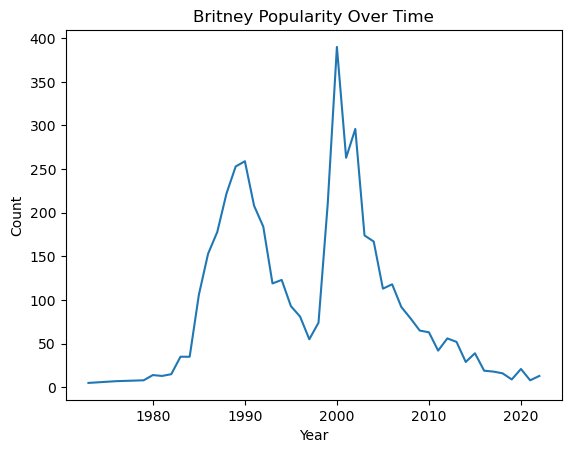

In [336]:
britney_baby_name = baby_names[(baby_names['Name'] == 'Britney') & (baby_names['State'] == 'CA') & (baby_names['Sex'] == 'F')]
plt.plot(britney_baby_name['Year'], britney_baby_name['Count'])
plt.title("Britney Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count')



The line graph plots the proportion of babies given the name "Britney" or "Brittany" each year from the 1970s to the 2000s. The plot clearly shows two distinct "spikes" or peaks in the name's popularity over this period.


The two spikes correspond to two different cultural phenomena:

1.  **First Spike (around 1990):** This peak reflects a general trend where the name **Brittany** became extremely fashionable and was a top-10 baby name in the U.S. This was driven by its overall popularity and the rising fame of actress Brittany Murphy.

2.  **Second Spike (around 2000):** This sharper, more dramatic peak is directly linked to the explosive rise of pop superstar **Britney Spears**. Her debut in late 1998 and subsequent albums in 1999 and 2000 made her a global icon, causing a massive, short-term surge in parents naming their daughters after her.

### Question 1.7

Now we will aggregate counts across all 50 states. Use `groupby()` to aggregate the data by "Name" and "Year", then `sum()` "Count" and finally `reset_index()` (this will turn the index, Name in this case, into a column).  

In [337]:
counts_aggregated_by_name_and_year = baby_names.groupby(['Name', 'Year'])['Count'].sum().reset_index()
counts_aggregated_by_name_and_year

,Name,Year,Count
0,Aaban,2013,6
1,Aaban,2014,6
2,Aadam,2019,6
3,Aadan,2008,12
4,Aadan,2009,6
...,...,...,...
621748,Zyriah,2014,6
621749,Zyriah,2016,5
621750,Zyron,2015,5
621751,Zyrus,2021,5


In [338]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Now you can use the below code to plot the frequency of any name of interest in the United States over time. 

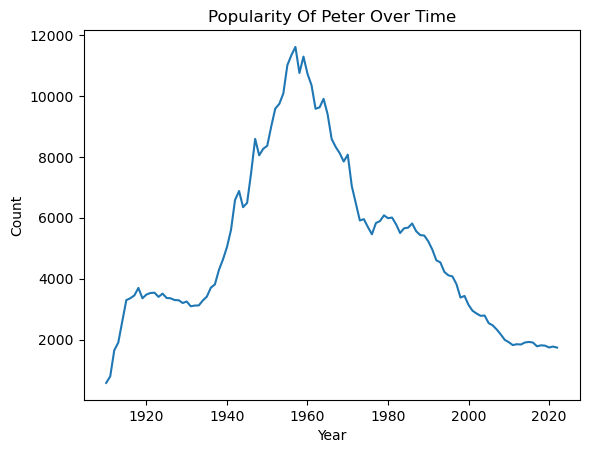

In [339]:
name_of_interest = 'Peter'
chosen_baby_name = counts_aggregated_by_name_and_year.query("Name == @name_of_interest")
plt.plot(chosen_baby_name['Year'], chosen_baby_name['Count'])
plt.title(f"Popularity Of {name_of_interest} Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

Well done. Now that you've been primed on data manipulation with `pandas`, we're going to do a little more practice without as much hand holding to challenge you. 

## Section 2: Filtering and aggregating COVID data

In thi section we'll examine the influence of the COVID pandemic on US jobs across different sectors.

In [340]:
jobs = pd.read_csv("./data/jobs.csv")
jobs

,observation_date,jobs,labor_force
0,2014-03-01,150036.0,156028
1,2014-04-01,150233.0,155369
2,2014-05-01,150572.0,155684
3,2014-06-01,151229.0,155707
4,2014-07-01,151245.0,156007
...,...,...,...
103,2022-10-01,169255.0,164679
104,2022-11-01,169187.0,164441
105,2022-12-01,170300.0,164998
106,2023-01-01,170577.0,165871


#### Question 2.1

Let's start by creating a new variable called "difference" in "jobs" that is the available labor force subtracted from jobs. Make this as a new column in your data.

In [341]:
jobs["difference"] = jobs["jobs"] - jobs["labor_force"]
jobs.head()

,observation_date,jobs,labor_force,difference
0,2014-03-01,150036.0,156028,-5992.0
1,2014-04-01,150233.0,155369,-5136.0
2,2014-05-01,150572.0,155684,-5112.0
3,2014-06-01,151229.0,155707,-4478.0
4,2014-07-01,151245.0,156007,-4762.0


In [342]:
grader.check("q2_1")

q2_1 results: All test cases passed!

What do positive and negative differences mean? 

**Your response**: A positive difference means there are more jobs than people available to take them, and vice versa for a negative difference.

#### Question 2.2

For how many months in our time series did the number of jobs exceed the size of the labor force?

In [343]:
months = 5
months

5

In [344]:
grader.check("q2_2")

q2_2 results: All test cases passed!

#### Question 2.3

Find the date that corresponds to the greatest negative difference between number of jobs and size of the labor force.

In [345]:
largest_difference_date  = jobs.loc[jobs["difference"].idxmin(), "observation_date"]
largest_difference_date

'2020-04-01'

Was there something going on at this point in time?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107],
 [Text(0, 0, '2014-03-01'),
  Text(1, 0, '2014-04-01'),
  Text(2, 0, '2014-05-01'),
  Text(3, 0, '2014-06-01'),
  Text(4, 0, '2014-07-01'),
  Text(5, 0, '2014-08-01'),
  Text(6, 0, '2014-09-01'),
  Text(7, 0, '2014-10-01'),
  Text(8, 0, '2014-11-01'),
  Text(9, 0, '2014-12-01'),
  Text(10, 0, '2015-01-01'),
  Text(11, 0, '2015-02-01'),
  Text(12, 0, '

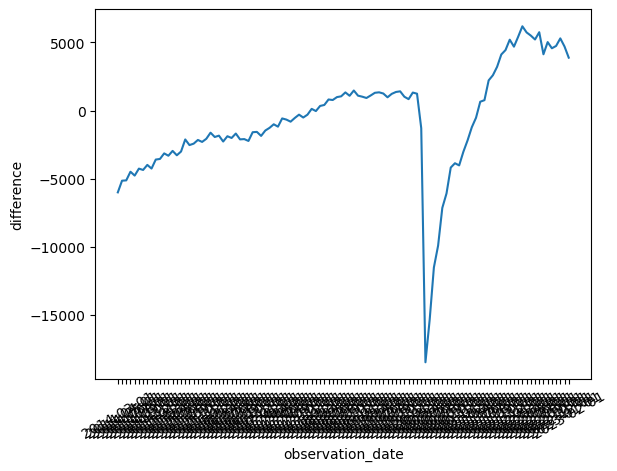

In [346]:
sns.lineplot(x = jobs["observation_date"], y = jobs["difference"])
plt.xticks(rotation=30)

**Your response**: The shutdowns due to COVID-19 quarantine were happening at this time.

#### Question 2.4 

Now we'll look at some data related to corporate profits before and after COVID.

In [347]:
profits = pd.read_csv("./data/corp_profits.csv")
profits["DATE"] = pd.to_datetime(profits["DATE"])
profits.head()

,DATE,profits_billions,product
0,2001-01-01,-3.680,motor_vehicles
1,2001-04-01,-6.525,motor_vehicles
2,2001-07-01,-4.313,motor_vehicles
3,2001-10-01,-12.627,motor_vehicles
4,2002-01-01,-11.678,motor_vehicles


What is the date range in our data? Note that we converted "DATE" to a datetime. "datetimes" can be operated on like any numeric variable. 

In [348]:
earliest = profits["DATE"].min()
latest = profits["DATE"].max()

In [349]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Question 2.5 

How were different industries affected by COVID? First, filter that data such that we only have dates beginning on Jan 1st in 2016 and after. Then create a new column in the data called "COVID" and give the value "pre-covid" if the dates are between 2016-01-01 and 2020-03-01, and "post-covid" for anything after. 

In [350]:
profits_recent = profits[profits["DATE"] >= "2016-01-01"].copy()
profits_recent["COVID"] = "pre-covid"

profits_recent.loc[profits_recent["DATE"] >= "2020-03-01", "COVID"] = "post-covid"
profits_recent

,DATE,profits_billions,product,COVID
60,2016-01-01,35.380,motor_vehicles,pre-covid
61,2016-04-01,35.931,motor_vehicles,pre-covid
62,2016-07-01,27.662,motor_vehicles,pre-covid
63,2016-10-01,25.442,motor_vehicles,pre-covid
64,2017-01-01,25.877,motor_vehicles,pre-covid
...,...,...,...,...
274,2023-01-01,130.154,computer_electronics,post-covid
275,2023-04-01,139.027,computer_electronics,post-covid
276,2023-07-01,146.196,computer_electronics,post-covid
277,2023-10-01,161.714,computer_electronics,post-covid


In [351]:
grader.check("q2_5")

q2_5 results: All test cases passed!

#### Questeion 2.6

Now find the average pre- and post-covid profit for each product. Remember that you can group by more than one variable.

In [352]:
avg_profits = (
    profits_recent
    .groupby(["product", "COVID"])
    ["profits_billions"].mean()
    .reset_index(name="avg_profit")
)

avg_profits

,product,COVID,avg_profit
0,chemical_products,post-covid,123.618750
1,chemical_products,pre-covid,58.932471
2,computer_electronics,post-covid,131.476188
3,computer_electronics,pre-covid,56.416647
4,motor_vehicles,post-covid,-0.013750
5,motor_vehicles,pre-covid,11.370529


Interpret the findings. Why do you think some industries saw increased profits while others saw decreased profits?

**Your response**: ...

## Section 3: Cleaning and joining data

We'll end this homework with an exercise in data cleaning and joining multiple relational datasets.

We have two datasets:
1. A dataset of every COVID treatment center in each incorporated township/city in the US
2. A dataset of the estimated population in each incorporated township/city in the US as of 2013.

Our ultimate goal is to determine which cities had the best COVID treatment infrastructure, represented by COVID treatment centers per capita. 

In [353]:
# COVID treatment centers
treat_centers = pd.read_csv("./data/COVID-19_Treatments_20240927.csv")
# Lowercase the town/city names to canonicalize them with the next dataset.
treat_centers["City"] = treat_centers["City"].str.lower()
treat_centers.head()

,Provider Name,Address 1,Address 2,City,State,Zip,Latitude,Longitude,Geopoint,Last Report Date,Has Paxlovid
0,WALGREENS #3351,6818 N ARMENIA AVE,NaN,tampa,FL,336045718,28.010111,-82.484895,POINT (-82.484895 28.010111),2024-09-20T00:00:00Z,False
1,PHARMALIFE LTC,2951 PIEDMONT RD NE STE B,NaN,atlanta,GA,303052782,33.834900,-84.367529,POINT (-84.367529 33.8349),2024-09-20T00:00:00Z,False
2,OSCO DRUG #3421,1402 21ST ST,NaN,zion,IL,600992304,42.457453,-87.828388,POINT (-87.828388 42.457453),2024-09-20T00:00:00Z,False
3,F & M DRUG LLC,209 N DOUGLAS,NaN,ellsworth,KS,67439,38.729736,-98.230233,POINT (-98.230233 38.729736),2024-09-20T00:00:00Z,False
4,PHARMACY ARTS,31 BURNLEY RD,NaN,scottsville,KY,42164,36.757415,-86.217386,POINT (-86.217386 36.757415),2024-09-20T00:00:00Z,False


#### Question 3.1

Find the number of COVID treatment centers in each town. Remember that each row is a single treatment center, and remember that towns/cities in different states can have the same name. 

*Hint*: The `size()` function will be helpful

In [354]:
treat_counts = (treat_centers.groupby(["City", "State"]).size().reset_index(name = "count"))
treat_counts

,City,State,count
0,abbeville,AL,2
1,abbeville,GA,1
2,abbeville,LA,6
3,abbeville,SC,2
4,abbotsford,WI,1
...,...,...,...
11277,zillah,WA,1
11278,zion,IL,5
11279,zionsville,IN,7
11280,zumbrota,MN,1


In [355]:
grader.check("q3_1")

q3_1 results: All test cases passed!

#### Question 3.2

Let's read in the population data.

In [356]:
# Town/city populations
city_pop = pd.read_csv("./data/pop_est.csv", encoding='latin-1')
city_pop["NAME"] = city_pop["NAME"].str.lower()
city_pop.head()

,NAME,STNAME,POPESTIMATE2023
0,abbeville,Alabama,2377
1,adamsville,Alabama,4172
2,addison,Alabama,667
3,akron,Alabama,224
4,alabaster,Alabama,34107


For whatever reason, the population data has many duplicated rows. First, determine how many rows are duplicated. Second, remove those rows from the data.

The easiest way to do this is with the `duplicated` method. The following cell will call up its documentation. 

In [357]:
help(pd.DataFrame.duplicated)

Help on function duplicated in module pandas.core.frame:

duplicated(self, subset: 'Hashable | Sequence[Hashable] | None' = None, keep: 'DropKeep' = 'first') -> 'Series'
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.duplicated : Equivalent method on index.
    Series.duplicated : Equiv

In [358]:
number_of_dups = city_pop.duplicated(subset=["NAME"]).sum()
number_of_dups

50031

In [359]:
city_pop = city_pop.drop_duplicates(subset=["NAME"])
city_pop

,NAME,STNAME,POPESTIMATE2023
0,abbeville,Alabama,2377
1,adamsville,Alabama,4172
2,addison,Alabama,667
3,akron,Alabama,224
4,alabaster,Alabama,34107
...,...,...,...
74427,frannie (pt.),Wyoming,122
74490,natrona,Wyoming,79941
74497,niobrara,Wyoming,2354
74530,uinta,Wyoming,20745


In [360]:
grader.check("q3_2")

q3_2 results: All test cases passed!

#### Question 3.3

We're getting close to joining the treatment centers dataframes and the population dataframe on a shared key. We might be tempted to join them on city names but this would be a careless thing to do (remember that different states can have towns/cities with the same name). This is instead a situation where multiple variables combine to form a unique key: town/city name and state. 

This poses an issue for us. While we have states in both frames, they are formatted differently. Thus, to fully relate them we need to pull in a third relation. 

In [361]:
states = pd.read_csv("./data/States.csv")
states.head()

,State,Standard,Postal
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


Join states on city_pop such that there is one new column in city_pop called "Postal". You may need to `.drop()` a redundant column after joining.

In [362]:
city_pop = city_pop.merge(states[["State", "Postal"]],left_on="STNAME", right_on="State",how="left")
city_pop = city_pop.drop(columns=["State"])

city_pop.head()

,NAME,STNAME,POPESTIMATE2023,Postal
0,abbeville,Alabama,2377,AL
1,adamsville,Alabama,4172,AL
2,addison,Alabama,667,AL
3,akron,Alabama,224,AL
4,alabaster,Alabama,34107,AL


In [363]:
grader.check("q3_3")

q3_3 results: All test cases passed!

#### Question 3.4

Now join city_pop and treat_counts. Ensure that you're only keeping rows where there are key matches i.e. do an "inner" join. 

In [364]:
pop_treat_merge = city_pop.merge(treat_counts,left_on= ["NAME", "Postal"], right_on=["City", "State"], how="inner")

pop_treat_merge

,NAME,STNAME,POPESTIMATE2023,Postal,City,State,count
0,abbeville,Alabama,2377,AL,abbeville,AL,2
1,adamsville,Alabama,4172,AL,adamsville,AL,1
2,addison,Alabama,667,AL,addison,AL,2
3,alabaster,Alabama,34107,AL,alabaster,AL,11
4,albertville,Alabama,23031,AL,albertville,AL,9
...,...,...,...,...,...,...,...
4468,rock springs,Wyoming,22954,WY,rock springs,WY,5
4469,sundance,Wyoming,1098,WY,sundance,WY,2
4470,thayne,Wyoming,433,WY,thayne,WY,1
4471,thermopolis,Wyoming,2742,WY,thermopolis,WY,1


In [365]:
grader.check("q3_4")

q3_4 results: All test cases passed!

#### Question 3.5

To determine the number of treatment centers per capita, we'll need to divide center count by population. There are certain values of one or the other that could cause issues when calculating this quantity. Use the `describe()` method to summarize the quantitative columns in the merged data. 

In [366]:
# Describe
pop_treat_merge.describe()

,POPESTIMATE2023,count
count,4.473000e+03,4473.000000
mean,3.045696e+04,6.591549
std,3.085032e+05,18.108799
min,2.500000e+01,1.000000
25%,2.329000e+03,1.000000
50%,6.815000e+03,3.000000
75%,2.126400e+04,6.000000
max,1.957122e+07,529.000000


If you identify any issues, filter the data to remove those values. Then create a new column called "centers_per_cap" in pop_treat_merge, representing the number of centers per capita in each town/city.

In [371]:
# Correct any issues if relevant
pop_treat_merge = pop_treat_merge[pop_treat_merge["POPESTIMATE2023"] > 0]

pop_treat_merge["centers_per_cap"] = (pop_treat_merge["count"] / pop_treat_merge["POPESTIMATE2023"])

In [372]:
pop_treat_merge

,NAME,STNAME,POPESTIMATE2023,Postal,City,State,count,centers_per_cap
0,abbeville,Alabama,2377,AL,abbeville,AL,2,0.000841
1,adamsville,Alabama,4172,AL,adamsville,AL,1,0.000240
2,addison,Alabama,667,AL,addison,AL,2,0.002999
3,alabaster,Alabama,34107,AL,alabaster,AL,11,0.000323
4,albertville,Alabama,23031,AL,albertville,AL,9,0.000391
...,...,...,...,...,...,...,...,...
4468,rock springs,Wyoming,22954,WY,rock springs,WY,5,0.000218
4469,sundance,Wyoming,1098,WY,sundance,WY,2,0.001821
4470,thayne,Wyoming,433,WY,thayne,WY,1,0.002309
4471,thermopolis,Wyoming,2742,WY,thermopolis,WY,1,0.000365


In [373]:
grader.check("q3_5")

q3_5 results: All test cases passed!

#### Question 3.6

Identify the five cities with the highest number of treatment cities per capita.

In [379]:
top5 = (pop_treat_merge.sort_values(by="centers_per_cap", ascending=False) .head(5))
top5

,NAME,STNAME,POPESTIMATE2023,Postal,City,State,count,centers_per_cap
859,alpine,California,1141,CA,alpine,CA,7,0.006135
1059,rehoboth beach,Delaware,1220,DE,rehoboth beach,DE,7,0.005738
1234,port richey,Florida,3485,FL,port richey,FL,15,0.004304
4170,kilmarnock,Virginia,1443,VA,kilmarnock,VA,6,0.004158
1305,blue ridge,Georgia,1233,GA,blue ridge,GA,5,0.004055


Do you think your findings are valid? Why or why not?

**Your response**: Yes, the findings seem valid because the cities all seem to be rural. None of the top 5 cities with the hihgest center per capita have more then 10 centers, and the largerst population estimate is under 250. Although these finding don't immediately write off any other problems, our method seems to be working as all fit the same pattern. 

#### Question 3.7

Filter the data for only population estimates above or equal to 1000, then again identify the top 5 cities. Return the answer as an array or series. 

In [380]:
pop_treat_merge = pop_treat_merge[pop_treat_merge["POPESTIMATE2023"] >= 1000]

In [381]:
top_cities = (pop_treat_merge.sort_values(by="centers_per_cap", ascending=False).head(5))

top_cities["City"]

859             alpine
1059    rehoboth beach
1234       port richey
4170        kilmarnock
1305        blue ridge
Name: City, dtype: object

In [382]:
grader.check("q3_7")

q3_7 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3a results: All test cases passed!

q1_3b results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_7 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_7 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

 - Save and Checkpoint

 - Close and Halt

Then upload your .ipynb file to Canvas assignment Homework 2